In [1]:
import pandas as pd # for basic data handling
from sklearn.model_selection import train_test_split # To split the data
from sklearn.linear_model import LogisticRegression # Machine Learning  MOdule for Logistics Regression 

from sklearn import metrics # For Performace MAtricess | Confusion Matrix 
                            # For any classification it is required to evaluate the model
    
import seaborn as sn # For Visualization 


In [11]:
print(dir(metrics))

metrics.accuracy_score?

['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutual_info_score', 'pairwise', 'pairwise_distances', 'pairwise_distance

In [2]:
Risk_data = {'CreditScore': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'DC_ratio': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'default': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

In [3]:

df = pd.DataFrame(Risk_data,columns= ['CreditScore', 'DC_ratio','work_experience','default'])

df.head(2)

,CreditScore,DC_ratio,work_experience,default
0,780,4.0,3,1
1,750,3.9,4,1


In [4]:
X = df[['CreditScore', 'DC_ratio','work_experience']] # Set of independent Variables

y = df['default'] # dependent Variable

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape) # 75% of 40
print(X_test.shape)  # 25% of 40
print(y_train.shape) 
print(y_test.shape)

(30, 3)
(10, 3)
(30,)
(10,)


In [6]:
# here you are actually building the model, in this case study this 
# LogisticRegression() function I am using 
# below is more about a readily available ML based technique
# [Statistical Modeling - GLM()]

logistic_regression= LogisticRegression()


In [7]:

# You are Building the Model
logistic_regression.fit(X= X_train,y = y_train) 
# logistic_regression is your model name which got trained on X



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Below you are going to compare the performance on training dataset 
# because this is on the model was 
pred_y_train = logistic_regression.predict(X_train)



pred_y_test =  logistic_regression.predict(X_test)

#pred_y_test # Predicted 0 or 1 on test data [25%]
print(pred_y_train) # Predicted 0 or 1 on test data [75%]

print(y_train)

[0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1]
27    0
35    0
37    0
2     1
39    1
30    0
34    1
16    0
36    0
8     1
13    1
5     1
17    1
14    1
33    1
7     1
32    1
1     1
26    1
12    1
31    0
24    0
6     0
23    0
21    0
19    0
9     0
38    0
3     1
0     1
Name: default, dtype: int64


Accuracy:  0.8


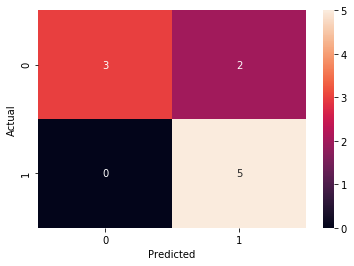

In [25]:
# Accuracy on test Data

confusion_matrix = pd.crosstab(y_test, pred_y_test, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, pred_y_test))

Accuracy:  0.9
AUC_ROC SCORE: This More reliable ;)  0.8973214285714286


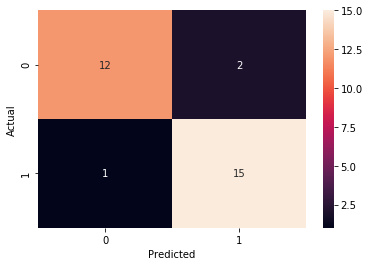

In [27]:
# Accuracy on train Data

confusion_matrix = pd.crosstab(y_train, pred_y_train, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_train, pred_y_train))

print('AUC_ROC SCORE: This More reliable ;) ',metrics.roc_auc_score(y_train, pred_y_train))

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

Risk_data = {'CreditScore': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'DC_ratio': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'default': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(Risk_data,columns= ['CreditScore', 'DC_ratio','work_experience','default'])

#print (df)

X = df[['CreditScore', 'DC_ratio','work_experience']]
y = df['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


In [19]:

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8
